In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [4]:
from helpers import load_data

# load dataset
x, y = load_data()

In [5]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)



In [65]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    ind_te = k_indices[k]
    ind_tr = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    ind_tr = ind_tr.reshape(-1)
    
    # Training Data
    y_tr = y[ind_tr]
    x_tr = x[ind_tr]
    tx_tr = build_poly(x_tr,degree)    
    
    # Test data
    y_te = y[ind_te]
    x_te = x[ind_te]
    tx_te = build_poly(x_te, degree)
    
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    _, w_ridge = ridge_regression(y_tr, tx_tr, lambda_)
    loss_tr = compute_mse(y_tr, tx_tr, w_ridge)
    loss_te = compute_mse(y_te, tx_te, w_ridge)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    return loss_tr, loss_te

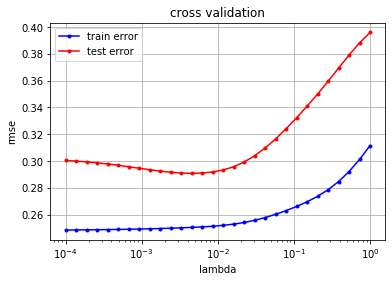

In [66]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    cross_validation(y,x,k_indices,2, 0.5, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    loss_tr_temp = []
    loss_te_temp = []
    for ind, lambda_ in enumerate(lambdas):
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y,x,k_indices,k, lambda_, degree)
            loss_tr_temp.append(loss_tr)
            loss_te_temp.append(loss_te)
            
        rmse_tr.append(np.sqrt(2*np.mean(loss_tr_temp)))
        rmse_te.append(np.sqrt(2*np.mean(loss_te_temp)))
        
        loss_tr_temp = []
        loss_te_temp = []

    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [67]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

NotImplementedError: 